# Exploring Customer Sentiments: A Deep Dive into TrustPilot Reviews

Welcome to my notebook, where I embark on a fascinating journey into the realm of customer sentiments expressed on the TrustPilot website. My goal is to unravel the emotions embedded in the reviews and discern any discernible trends that may lurk within each customer's narrative.

## Section 1: Data Importing and Exploration
First things first, let's dive into the world of data. I'll kick things off by importing the web-scraped data using the mighty pandas library. Once the data is at my fingertips, I'll embark on a journey of exploration, unraveling its mysteries. I'll scrutinize data types, peer into the contents of each cell, and make sense of the information lurking within the dataset.

## Section 2: Cleaning the Data for Clarity
With the raw data in hand, it's time to roll up my sleeves and give it a makeover. I'll engage in a bit of data wrangling, manipulating the dataframe to enhance its presentability. This involves tweaking columns, reshaping content, and ensuring that the data is not just informative but also easy on the eyes for you, the reader.

## Section 3: Analyzing Customer Sentiments
Now that our data is prim and proper, let's get down to the nitty-gritty of analysis. I'll be dissecting the refined contents, leveraging visuals such as word clouds and graphs to bring the trends to life. To add an extra layer of insight, I'll introduce supplementary columns that will serve as guides on this analytical journey.

Whether it's joy, frustration, or a mixed bag of emotions, I'll be your guide through the landscape of sentiments, providing a nuanced understanding of why these trends unfold.

## Section 4: Drawing Insights and Conclusions
As we wrap up this expedition, I'll weave together the threads of analysis to draw compelling insights. The combination of data-driven revelations and the human touch in understanding emotions will paint a vivid picture of the customer landscape on TrustPilot. So, fasten your seatbelts, and let's navigate the intricate tapestry of customer sentiments together!

## Section 1: Data Importing

### Importing Libraries

In [1]:
#for data manipulation/cleaning
import pandas as pd
import numpy as np
import re
import warnings
import string

#for data visualistaion
import matplotlib.pyplot as plt 
import seaborn as sbn

#for machine learning/text analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter
import spacy
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

warnings.filterwarnings('ignore')

### the Dataset

In [2]:
data1 = pd.read_csv(r"C:\Users\zacky\Desktop\Projects\Data Analyst\Data Cleaning\Dataset 1 - Pure Gym Reviews\PureGym UK Reviews _ Read Customer Service Reviews of www.puregym.csv")
data2 = pd.read_csv(r"C:\Users\zacky\Desktop\Projects\Data Analyst\Data Cleaning\Dataset 1 - Pure Gym Reviews\PureGym UK Reviews _ Read Customer Service Reviews of www.puregym(1).csv")

In [3]:
data1

,Title,Title_URL,Like,Like1,typography_bodym_xgxz,Image,typography_bodym_xgxz2,link_internal_7xn06_URL,Like3,typography_bodyl_kuyfj,...,Image1,typography_bodym_xgx1,link_internal_7xn06_URL1,Lik2,typography_bodyl_kuyfj1,typography_bodym_xgx2,typography_bodym_xgx3,Reply1,Repl1,typography_bodym_xgx4
0,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,Date of experience: 17 December 2023,Date of experience:,NaN,NaN,NaN
1,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,https://uk.trustpilot.com/reviews/657a0f7d5a22...,Overall a good experience,Overall a good experience.\nIt's still too cra...,Date of experience: 13 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,5 days ago,https://uk.trustpilot.com/reviews/6578d018678e...,Excellent gym,"Excellent gym, friendly environment, plenty of...",Date of experience: 12 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,10 hours ago,https://uk.trustpilot.com/reviews/657ee91bc97a...,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,Date of experience: 12 November 2023,Date of experience:,NaN,NaN,NaN
4,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,https://uk.trustpilot.com/reviews/657a2641e773...,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,Date of experience: 13 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,8 Dec 2021,https://uk.trustpilot.com/reviews/61b08dd30b7c...,Lots of choice on equipment and very…,Lots of choice on equipment and very clean wit...,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,Hi Stephen. Thanks for taking the ti

In [4]:
data2

,Title,Title_URL,Like,Like1,typography_bodym_xgxz,Image,typography_bodym_xgxz2,link_internal_7xn06_URL,Like3,typography_bodyl_kuyfj,...,Image1,typography_bodym_xgx1,link_internal_7xn06_URL1,Lik2,typography_bodyl_kuyfj1,typography_bodym_xgx2,typography_bodym_xgx3,Reply1,Repl1,typography_bodym_xgx4
0,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,8 Dec 2021,https://uk.trustpilot.com/reviews/61b080d12b49...,Excellent,Excellent gym,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,Hi. Thanks for taking the time to leave this r...
1,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,8 Dec 2021,https://uk.trustpilot.com/reviews/61b0792b2b49...,Excellent gym and facilities…,NaN,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,Hi. Thanks for taking the time to leave this r...
2,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,8 Dec 2021,https://uk.trustpilot.com/reviews/61b0781b2b49...,Just joined and loving the classes,Just joined and loving the classes. spin has b...,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,Hi. Thanks for taking the time to leave this r...
3,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,Updated 8 Dec 2021,https://uk.trustpilot.com/reviews/61b075de0b7c...,Stoke North,Such a nice gym. Everything’s really clean and...,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,Hi Lucy. Thanks for taking the time to leave t...
4,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,8 Dec 2021,https://uk.trustpilot.com/reviews/61b06a4a0b7c...,Where’s the door?,I attended the yoga class last night in the st...,Date of experience: 08 December 2021,Date of experience:,Reply from PureGym UK,9 Dec 2021,"Hi Dianne, thanks for leaving us a review. we ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,1 review,https://uk.trustpilot.com/users/567dcc120000ff...,MX,mxforlove8,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,25 Dec 2015,https://uk.trustpilot.com/reviews/567dd7500000...,Leeds city centre north puregym has the most M...,Going for a while to Leeds city centre north p...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,23 Oct 2015,https://uk.trustpilot.com/reviews/562a3f350000...,Cheap and cheerful,If you are not very picky and don't expect sau...,Date of experience: 23 October 2015,Date of experience:,NaN,NaN,NaN
15465,1 review,https://uk.trustpilot.com/users/56

### Data Exploration

In [5]:
print("data1")
print(data1.info())
print("data2")
print(data2.info())

data1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Title                     20000 non-null  object 
 1   Title_URL                 20000 non-null  object 
 2   Like                      20000 non-null  object 
 3   Like1                     20000 non-null  object 
 4   typography_bodym_xgxz     20000 non-null  object 
 5   Image                     20000 non-null  object 
 6   typography_bodym_xgxz2    20000 non-null  object 
 7   link_internal_7xn06_URL   20000 non-null  object 
 8   Like3                     20000 non-null  object 
 9   typography_bodyl_kuyfj    20000 non-null  object 
 10  typography_bodym_xgxz4    20000 non-null  object 
 11  typography_bodym_xgxz5    20000 non-null  object 
 12  Reply                     0 non-null      float64
 13  Reply6                    0 non-null      float64
 14  

In [6]:
data1['Lik1'].value_counts()

Lik1
customer                3720
Customer                 177
David                     44
James                     42
Mark                      42
                        ... 
STEVE                      1
Miss Elizabeth Alder       1
Harjinder Sandhu           1
Lorenzo                    1
Alex Catea                 1
Name: count, Length: 13457, dtype: int64

### Merge two datasets

In [7]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [8]:
data

,Title,Title_URL,Like,Like1,typography_bodym_xgxz,Image,typography_bodym_xgxz2,link_internal_7xn06_URL,Like3,typography_bodyl_kuyfj,...,Image1,typography_bodym_xgx1,link_internal_7xn06_URL1,Lik2,typography_bodyl_kuyfj1,typography_bodym_xgx2,typography_bodym_xgx3,Reply1,Repl1,typography_bodym_xgx4
0,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,Date of experience: 17 December 2023,Date of experience:,NaN,NaN,NaN
1,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,https://uk.trustpilot.com/reviews/657a0f7d5a22...,Overall a good experience,Overall a good experience.\nIt's still too cra...,Date of experience: 13 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,5 days ago,https://uk.trustpilot.com/reviews/6578d018678e...,Excellent gym,"Excellent gym, friendly environment, plenty of...",Date of experience: 12 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,10 hours ago,https://uk.trustpilot.com/reviews/657ee91bc97a...,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,Date of experience: 12 November 2023,Date of experience:,NaN,NaN,NaN
4,1 review,https://uk.trustpilot.com/users/657f0061d4d2a7...,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,https://uk.trustpilot.com/reviews/657f007347c4...,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,https://uk.trustpilot.com/reviews/657a2641e773...,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,Date of experience: 13 December 2023,Date of experience:,Reply from PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35464,1 review,https://uk.trustpilot.com/users/567dcc120000ff...,MX,mxforlove8,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,25 Dec 2015,https://uk.trustpilot.com/reviews/567dd7500000...,Leeds city centre north puregym has the most M...,Going for a while to Leeds city centre north p...,...,https://cdn.trustpilot.net/brand-assets/4.1.0/...,23 Oct 2015,https://uk.trustpilot.com/reviews/562a3f350000...,Cheap and cheerful,If you are not very picky and don't expect sau...,Date of experience: 23 October 2015,Date of experience:,NaN,NaN,NaN
35465,1 review,https://uk.trustpilot.com/users/567dcc120000ff...,MX,mxforlove8

Since we have two datasets that virtually produce the same data contents, merging them would make life a lot easier when cleaning the dataframe for analysis

## Section 2: Data Cleaning

### Cleaning Columns

#### Droping columns

In [12]:
data.columns

Index(['Title', 'Title_URL', 'Like', 'Like1', 'typography_bodym_xgxz', 'Image',
       'typography_bodym_xgxz2', 'link_internal_7xn06_URL', 'Like3',
       'typography_bodyl_kuyfj', 'typography_bodym_xgxz4',
       'typography_bodym_xgxz5', 'Reply', 'Reply6', 'typography_bodym_xgxz7',
       'Field1', 'Field2', 'Title1', 'Title_URL1', 'Like2', 'Lik1',
       'typography_bodym_xgxz1', 'Image1', 'typography_bodym_xgx1',
       'link_internal_7xn06_URL1', 'Lik2', 'typography_bodyl_kuyfj1',
       'typography_bodym_xgx2', 'typography_bodym_xgx3', 'Reply1', 'Repl1',
       'typography_bodym_xgx4'],
      dtype='object')

In [13]:
columnstoDrop = ['Title', 'Title_URL', 'Like', 'Like1', 'typography_bodym_xgxz', 'Image',
                 'typography_bodym_xgxz2', 'link_internal_7xn06_URL', 'Like3',
                 'typography_bodyl_kuyfj', 'typography_bodym_xgxz4',
                 'typography_bodym_xgxz5', 'Reply', 'Reply6', 'typography_bodym_xgxz7',
                 'Field1', 'Field2', 'Title_URL1', 'link_internal_7xn06_URL1', 'typography_bodym_xgx3']

cleaningData = data.drop(columns = columnstoDrop, axis = 1)
cleaningData

,Title1,Like2,Lik1,typography_bodym_xgxz1,Image1,typography_bodym_xgx1,Lik2,typography_bodyl_kuyfj1,typography_bodym_xgx2,Reply1,Repl1,typography_bodym_xgx4
0,1 review,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,Date of experience: 17 December 2023,NaN,NaN,NaN
1,4 reviews,NaN,Graham F,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,Overall a good experience,Overall a good experience.\nIt's still too cra...,Date of experience: 13 December 2023,Reply from PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8 reviews,IO,Ian Oldham,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,5 days ago,Excellent gym,"Excellent gym, friendly environment, plenty of...",Date of experience: 12 December 2023,Reply from PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15 reviews,MB,Mick Bayley,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,10 hours ago,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,Date of experience: 12 November 2023,NaN,NaN,NaN
4,1 review,LU,Lucy,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,Date of experience: 13 December 2023,Reply from PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...
35464,12 reviews,OL,Olga,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,23 Oct 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,Date of experience: 23 October 2015,NaN,NaN,NaN
35465,12 reviews,NaN,Paul John Cox,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,18 Feb 2015,NO excuses now!,I admit im not in the best shape and intend to...,Date of experience: 18 February 2015,NaN,NaN,NaN
35466,22 reviews,NaN,Charlotte,DK,https://cdn.trustpilot.net/brand-assets/4.1.0/...,7 Feb 2015,Great classes,"The classes are great, I signed up due to the ...",Date of experience: 07 February 2015,NaN,NaN,NaN
35467,15 reviews,RA,Ross Anderson,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,12 Aug 2014,Decent gym,The pure gyms are well equipped and have every...,Date of experience: 12 August 2014,NaN,NaN,NaN


The columns that are listed within the array are columns that either have no values stored in the them at all, duplicated columns or columns that are of no use to the analysis, so they have been dropped from the dataframe. we are now left with 12 columns that are useful to us and we can focus on these individual columns

#### Change Column Titles

In [14]:
titleDict = {'Title1' : 'Total Reviews',
             'Like2': 'Profile Image',
             'Lik1' : 'Customer Name',
             'typography_bodym_xgxz1' : 'Country Code',
             'Image1' : 'Ratings Image',
             'typography_bodym_xgx1' : 'Date Posted',
             'Lik2' : 'Review Title',
             'typography_bodyl_kuyfj1': 'Review',
             'typography_bodym_xgx2' : 'Date of experience',
             'Reply1' : 'Owner',
             'Repl1': 'Owner Date Posted',
             'typography_bodym_xgx4' : 'Owners Response'
}

cleaningData.rename(titleDict, axis = 1, inplace = True)

cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Ratings Image,Date Posted,Review Title,Review,Date of experience,Owner,Owner Date Posted,Owners Response
0,1 review,EC,Elena Curtis,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,9 hours ago,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,Date of experience: 17 December 2023,NaN,NaN,NaN
1,4 reviews,NaN,Graham F,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,Overall a good experience,Overall a good experience.\nIt's still too cra...,Date of experience: 13 December 2023,Reply from PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8 reviews,IO,Ian Oldham,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,5 days ago,Excellent gym,"Excellent gym, friendly environment, plenty of...",Date of experience: 12 December 2023,Reply from PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15 reviews,MB,Mick Bayley,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,10 hours ago,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,Date of experience: 12 November 2023,NaN,NaN,NaN
4,1 review,LU,Lucy,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,4 days ago,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,Date of experience: 13 December 2023,Reply from PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...
35464,12 reviews,OL,Olga,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,23 Oct 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,Date of experience: 23 October 2015,NaN,NaN,NaN
35465,12 reviews,NaN,Paul John Cox,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,18 Feb 2015,NO excuses now!,I admit im not in the best shape and intend to...,Date of experience: 18 February 2015,NaN,NaN,NaN
35466,22 reviews,NaN,Charlotte,DK,https://cdn.trustpilot.net/brand-assets/4.1.0/...,7 Feb 2015,Great classes,"The classes are great, I signed up due to the ...",Date of experience: 07 February 2015,NaN,NaN,NaN
35467,15 reviews,RA,Ross Anderson,GB,https://cdn.trustpilot.net/brand-assets/4.1.0/...,12 Aug 2014,Decent gym,The pure gyms are well equipped and have every...,Date of experience: 12 August 2014,NaN,NaN,NaN


To make the columns a lot more easier to understand, we will change the title of the columns to help us understand what kind of information the column may hold wihtin the dataframe.

#### Creating a new data column

Creating a new column for reviews, so that we may see the integer version instead of an image to the ratings, it would be useful for our analysis.

In [28]:
# define the rating values
ratingValues = []

#for elements in the column Ratings Image
for element in cleaningData['Ratings Image']:
    # if the string of 5 is present in the element
    if "5"  in element:
        # add 5 to the array
        ratingValues.append("5")
    # if the string of 4 is present in the element
    if "4" in element:
        # add 4 to the array
        ratingValues.append("4")
    if "3" in element:
        ratingValues.append("3")
    if "2" in element:
        ratingValues.append("2")
    if "1" in element:
        ratingValues.append("1")
        
    
# insert a new column
cleaningData.insert(
        # with the location being 4 in the array of columns
        loc = 4,
        # title the column "Rating"
        column = "Ratings",
        # set the values to the array defined earlier
        value = ratingValues
)

# drop the column that contains the image 
cleaningData = cleaningData.drop(columns = "Ratings Image", axis = 1)

In [29]:
cleaningData.head(3)

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Posted,Review Title,Review,Date of experience,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,9 hours ago,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,17 December 2023,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,4 days ago,Overall a good experience,Overall a good experience.\nIt's still too cra...,13 December 2023,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,5 days ago,Excellent gym,"Excellent gym, friendly environment, plenty of...",12 December 2023,PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,10 hours ago,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,12 November 2023,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,4 days ago,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,13 December 2023,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...
35464,12,OL,Olga,GB,4,23 Oct 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,23 October 2015,PureGym UK,No Date Provided,No Response Provided
35465,12,Custom Image,Paul John Cox,GB,5,18 Feb 2015,NO excuses now!,I admit im not in the best shape and intend to...,18 February 2015,PureGym UK,No Date Provided,No Response Provided
35466,22,Custom Image,Charlotte,DK,5,7 Feb 2015,Great classes,"The classes are great, I signed up due to the ...",07 February 2015,PureGym UK,No Date Provided,No Response Provided
35467,15,RA,Ross Anderson,GB,4,12 Aug 2014,Decent gym,The pure gyms are well equipped and have every...,12 August 2014,PureGym UK,No Date Provided,No Response Provided


Popping a column, then slotting it onto the column that has been dropped would allow for the review provided by the customer to be accurate

In [30]:
# defined dataPopped by popping a column
dataPopped = cleaningData.pop("Date of experience")

# insert the popped column into the dataframe
cleaningData.insert(
    # set the location to array value 6
    loc=6,
    # set the title to Date Experienced
    column="Date Experienced",
    # set the values to the popped data
    value=dataPopped
)

# dropped the column for date posted
cleaningData = cleaningData.drop(columns = "Date Posted", axis = 1)

cleaningData.head(3)

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,17 December 2023,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,13 December 2023,Overall a good experience,Overall a good experience.\nIt's still too cra...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,12 December 2023,Excellent gym,"Excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,12 November 2023,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,13 December 2023,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...
35464,12,OL,Olga,GB,4,23 October 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,PureGym UK,No Date Provided,No Response Provided
35465,12,Custom Image,Paul John Cox,GB,5,18 February 2015,NO excuses now!,I admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided
35466,22,Custom Image,Charlotte,DK,5,07 February 2015,Great classes,"The classes are great, I signed up due to the ...",PureGym UK,No Date Provided,No Response Provided
35467,15,RA,Ross Anderson,GB,4,12 August 2014,Decent gym,The pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided


### Cleaning Nan

During the scraping process of the trust pilot reviews, some reviews may have had no title, may have use custom profile pictures etc. Jupyter can't detect these so they will be presented as NaN values. Filling these NaN values correctly would ensure that are analysis would stay reletively on point

In [75]:
cleaningData.isna().sum()

Total Reviews        0
Profile Image        0
Customer Name        0
Country Code         0
Rating               0
Date Experienced     0
Review Title         0
Review               0
Sentiment            0
Confidence           0
Owner                0
Owner Date Posted    0
Owners Response      0
Has Responded?       0
Date                 0
Tokens               0
dtype: int64

In [72]:
cleaningData.loc[:, 'Profile Image'] = cleaningData['Profile Image'].fillna("Custom Image")

In [73]:
cleaningData.loc[:, 'Customer Name'] = cleaningData['Customer Name'].fillna("Anonymous")

In [74]:
cleaningData.loc[:, 'Country Code'] = cleaningData['Country Code'].fillna("GB")

In [22]:
cleaningData.loc[:, 'Review Title'] = cleaningData['Review Title'].fillna("Not applicable")

In [23]:
cleaningData.loc[:, 'Review'] = cleaningData['Review'].fillna("Not Provided")

In [24]:
cleaningData.loc[:, 'Owner'] = cleaningData['Owner'].fillna("PureGym UK")

In [25]:
cleaningData.loc[:, 'Owner Date Posted'] = cleaningData['Owner Date Posted'].fillna("No Date Provided")

In [26]:
cleaningData.loc[:, 'Owners Response'] = cleaningData['Owners Response'].fillna("No Response Provided")

In [76]:
cleaningData.isna().sum()

Total Reviews        0
Profile Image        0
Customer Name        0
Country Code         0
Rating               0
Date Experienced     0
Review Title         0
Review               0
Sentiment            0
Confidence           0
Owner                0
Owner Date Posted    0
Owners Response      0
Has Responded?       0
Date                 0
Tokens               0
dtype: int64

In [27]:
cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Ratings Image,Date Posted,Review Title,Review,Date of experience,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,stars-4.svg,9 hours ago,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,17 December 2023,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,stars-4.svg,4 days ago,Overall a good experience,Overall a good experience.\nIt's still too cra...,13 December 2023,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,stars-5.svg,5 days ago,Excellent gym,"Excellent gym, friendly environment, plenty of...",12 December 2023,PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,stars-5.svg,10 hours ago,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,12 November 2023,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,stars-5.svg,4 days ago,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,13 December 2023,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...
35464,12,OL,Olga,GB,stars-4.svg,23 Oct 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,23 October 2015,PureGym UK,No Date Provided,No Response Provided
35465,12,Custom Image,Paul John Cox,GB,stars-5.svg,18 Feb 2015,NO excuses now!,I admit im not in the best shape and intend to...,18 February 2015,PureGym UK,No Date Provided,No Response Provided
35466,22,Custom Image,Charlotte,DK,stars-5.svg,7 Feb 2015,Great classes,"The classes are great, I signed up due to the ...",07 February 2015,PureGym UK,No Date Provided,No Response Provided
35467,15,RA,Ross Anderson,GB,stars-4.svg,12 Aug 2014,Decent gym,The pure gyms are well equipped and have every...,12 August 2014,PureGym UK,No Date Provided,No Response Provided


### Cleaning internal Data

#### Removing clogging text

In this section of cleaning/manipulating data, we will just go ahead and just trim/remove some unnecassary string to prevent clogging and to give us a clearer picture of our dataframe.

In [ ]:
reviewText = cleaningData['Total Reviews']

# for the index and the element in the enumerate of the column
for i, element in enumerate(reviewText):
    # if there is a string called "Review" in the element
    if "review" in element:
        # within that index of the column, replace the element with nothing
        cleaningData['Total Reviews'][i] = element.replace("review", "")
    # else if reviews are within the element
    elif "reviews" in element:
        # within that index of the column, replace the element with nothing
        cleaningData['Total Reviews'][i] = element.replace("reviews", "")

# since some reviews strings haven't been cleaned, it's best to just strip the s just to be final
cleaningData['Total Reviews'] = cleaningData['Total Reviews'].str.rstrip("s")
        
# call the dataframe
cleaningData

In [ ]:
# replace the string of Date of Experience with nothing but the date.
cleaningData['Date of experience'] = cleaningData['Date of experience'].str.replace("Date of experience: ", "")

cleaningData

In [18]:
# Clearing "Reply From" So that we are left with just the owner in the owner column of the review
cleaningData['Owner'] = cleaningData['Owner'].str.replace("Reply from ", "")

cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Ratings Image,Date Posted,Review Title,Review,Date of experience,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,stars-4.svg,9 hours ago,"A well equipped gym, lacked cleaning facilities",A well equipped gym and only noticed one machi...,17 December 2023,NaN,NaN,NaN
1,4,NaN,Graham F,GB,stars-4.svg,4 days ago,Overall a good experience,Overall a good experience.\nIt's still too cra...,13 December 2023,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,stars-5.svg,5 days ago,Excellent gym,"Excellent gym, friendly environment, plenty of...",12 December 2023,PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,stars-5.svg,10 hours ago,I'm going to be so fit,Havnt been a gym member for 20 years but this ...,12 November 2023,NaN,NaN,NaN
4,1,LU,Lucy,GB,stars-5.svg,4 days ago,Chloe Lawrence PT @ PureGym,I have been training with Chloe Lawrence at Pu...,13 December 2023,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...,...
35464,12,OL,Olga,GB,stars-4.svg,23 Oct 2015,Cheap and cheerful,If you are not very picky and don't expect sau...,23 October 2015,NaN,NaN,NaN
35465,12,NaN,Paul John Cox,GB,stars-5.svg,18 Feb 2015,NO excuses now!,I admit im not in the best shape and intend to...,18 February 2015,NaN,NaN,NaN
35466,22,NaN,Charlotte,DK,stars-5.svg,7 Feb 2015,Great classes,"The classes are great, I signed up due to the ...",07 February 2015,NaN,NaN,NaN
35467,15,RA,Ross Anderson,GB,stars-4.svg,12 Aug 2014,Decent gym,The pure gyms are well equipped and have every...,12 August 2014,NaN,NaN,NaN


#### Cleaning Reviews

In this section of the analysis, i will clean the review sections of the dataframe, this is to ensure that we have the most accurate values for our premade model to detect the emotions within the analysis.

In [31]:
# we would want our dataframe to not have any duplicate reviews that could clog our analysis
cleaningData = cleaningData.drop_duplicates("Review")

# reseting the index of the dataframe.
cleaningData = cleaningData.reset_index(drop=True)

In [32]:
# we would also wnat our reviews to be of string lowercase
cleaningData.loc[:, 'Review'] = cleaningData.Review.str.lower()

In [33]:
cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,17 December 2023,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,13 December 2023,Overall a good experience,overall a good experience.\nit's still too cra...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,12 December 2023,Excellent gym,"excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,12 November 2023,I'm going to be so fit,havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,13 December 2023,Chloe Lawrence PT @ PureGym,i have been training with chloe lawrence at pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...
35284,12,OL,Olga,GB,4,23 October 2015,Cheap and cheerful,if you are not very picky and don't expect sau...,PureGym UK,No Date Provided,No Response Provided
35285,12,Custom Image,Paul John Cox,GB,5,18 February 2015,NO excuses now!,i admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided
35286,22,Custom Image,Charlotte,DK,5,07 February 2015,Great classes,"the classes are great, i signed up due to the ...",PureGym UK,No Date Provided,No Response Provided
35287,15,RA,Ross Anderson,GB,4,12 August 2014,Decent gym,the pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided


In [34]:
cleaningData.loc[:, 'Review'] = cleaningData['Review'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)

In [35]:
cleaningData.loc[:, 'Review Title'] = cleaningData['Review Title'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)

The code has been extended to further enhance the quality of the dataset by removing emojis from both the 'Review' and 'Review Title' columns. This modification aims to ensure that the textual content within these columns conveys emotions in a clear and accurate manner. By eliminating emojis, which can sometimes be interpreted differently or may not align with the desired emotional analysis, the data becomes more consistent and suitable for emotion detection tasks. This step aligns with the goal of relying solely on the natural language in reviews and review titles to provide unambiguous signals for emotion analysis within the DataFrame.

In [36]:
cleaningData.loc[:, 'Review Title'] = cleaningData['Review Title'].str.replace("@", "at")

In [37]:
cleaningData.loc[:, 'Review'] = cleaningData['Review'].astype(str).str.replace(r"^[][\s]*$|(^\[+|\]+$|')", lambda m: '' if m.group(1) else np.nan, regex=True)

In [38]:
cleaningData.loc[:, 'Review'] = cleaningData['Review'].str.replace('\n', ' ')

The code snippet performs essential data cleaning operations on a DataFrame. Firstly, it replaces '@' with 'at' in the 'Review Title' column, enhancing consistency and readability. Secondly, in the 'Review' column, it transforms empty or whitespace-only strings and removes single quotes, replacing them with NaN values. This step is vital for handling irrelevant or missing data. Lastly, newline characters ('\n') in the 'Review' column are replaced with spaces, ensuring the text is continuous and facilitating subsequent natural language processing or sentiment analysis tasks. Overall, these cleaning steps contribute to a more standardized and analytically useful dataset by addressing common data quality issues.

In [39]:
cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,17 December 2023,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,13 December 2023,Overall a good experience,overall a good experience. its still too cramp...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,12 December 2023,Excellent gym,"excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,12 November 2023,I'm going to be so fit,havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,13 December 2023,Chloe Lawrence PT at PureGym,i have been training with chloe lawrence at pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...
35284,12,OL,Olga,GB,4,23 October 2015,Cheap and cheerful,if you are not very picky and dont expect saun...,PureGym UK,No Date Provided,No Response Provided
35285,12,Custom Image,Paul John Cox,GB,5,18 February 2015,NO excuses now!,i admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided
35286,22,Custom Image,Charlotte,DK,5,07 February 2015,Great classes,"the classes are great, i signed up due to the ...",PureGym UK,No Date Provided,No Response Provided
35287,15,RA,Ross Anderson,GB,4,12 August 2014,Decent gym,the pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided


In [40]:
cleaningData.loc[:, 'Owners Response'] = cleaningData['Owners Response'].astype(str).str.replace(r"^[][\s]*$|(^\[+|\]+$|')", lambda m: '' if m.group(1) else np.nan, regex=True)

In [41]:
cleaningData.loc[:, 'Owners Response'] = cleaningData['Owners Response'].astype(str).str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)

Simalarly, we perform the same actions onto the response

#### Converting Data Types

This section focuses on the Data Types of the dataframe that has been cleaned, we want them to be of different typings as it would help us later on into our analysis.

In [42]:
cleaningData.loc[:, 'Total Reviews'] = pd.to_numeric(cleaningData['Total Reviews'], errors='coerce')
cleaningData['Total Reviews'] = cleaningData['Total Reviews'].astype('int64')

In [43]:
cleaningData.loc[:, 'Rating'] = pd.to_numeric(cleaningData['Rating'], errors='coerce')
cleaningData['Rating'] = cleaningData['Rating'].astype('float')

In [44]:
cleaningData['Date Experienced'] = pd.to_datetime(cleaningData['Date Experienced'], format='%d %B %Y').dt.strftime('%d/%m/%Y')

In [45]:
cleaningData['Date Experienced'] = pd.to_datetime(cleaningData['Date Experienced'], format='%d/%m/%Y', errors='coerce')

The code snippet focuses on transforming specific columns in the DataFrame 'cleaningData' into appropriate data types. Firstly, the 'Total Reviews' column is converted to numeric values, with any conversion errors replaced by NaN values. Subsequently, these NaN values are coerced to integer type, ensuring the 'Total Reviews' values are represented as whole numbers. Similarly, the 'Rating' column undergoes a similar process, first converting to numeric and then coercing the values to float type. Additionally, the 'Date Experienced' column is converted to a datetime format using the specified format '%d %B %Y' and then reformatted to '%d/%m/%Y'. This sequence of operations ensures uniform data types, enabling numerical and date-based analyses while handling potential inconsistencies in the original data.

In [46]:
cleaningData

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,2023-12-17,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,2023-12-13,Overall a good experience,overall a good experience. its still too cramp...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,2023-12-12,Excellent gym,"excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,2023-11-12,I'm going to be so fit,havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,2023-12-13,Chloe Lawrence PT at PureGym,i have been training with chloe lawrence at pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...
35284,12,OL,Olga,GB,4,2015-10-23,Cheap and cheerful,if you are not very picky and dont expect saun...,PureGym UK,No Date Provided,No Response Provided
35285,12,Custom Image,Paul John Cox,GB,5,2015-02-18,NO excuses now!,i admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided
35286,22,Custom Image,Charlotte,DK,5,2015-02-07,Great classes,"the classes are great, i signed up due to the ...",PureGym UK,No Date Provided,No Response Provided
35287,15,RA,Ross Anderson,GB,4,2014-08-12,Decent gym,the pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided


In [48]:
cleaningData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31649 entries, 0 to 35288
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Total Reviews      31649 non-null  int64         
 1   Profile Image      31649 non-null  object        
 2   Customer Name      31649 non-null  object        
 3   Country Code       31649 non-null  object        
 4   Rating             31649 non-null  int64         
 5   Date Experienced   31649 non-null  datetime64[ns]
 6   Review Title       31649 non-null  object        
 7   Review             31649 non-null  object        
 8   Owner              31649 non-null  object        
 9   Owner Date Posted  31649 non-null  object        
 10  Owners Response    31649 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 2.9+ MB


## Section 3: Data Analysis

In this concluding section of the notebook, we embark on two distinct types of analyses to extract meaningful insights from our dataset.

### **Basic Analysis**

Our focus here is on examining non-textual columns such as 'Total Reviews,' 'Rating,' and 'Date Experienced.' Through this, we aim to uncover patterns and trends in quantitative data, offering a comprehensive understanding of the dataset beyond the textual realm.

### **Sentiment Analysis:**

Shifting our attention to the rich narrative encapsulated in the reviews, our objective is to unravel the emotions embedded in each text. By employing natural language processing techniques, we strive to discern prevailing sentiments and identify trends in the art of crafting these reviews. This qualitative exploration adds a human touch to the analysis, providing valuable context and shedding light on the nuanced dynamics that influence the overall sentiment and perception reflected in the dataset. Together, these dual analyses offer a holistic view, combining quantitative insights with the intricate sentiments woven into the fabric of the reviews.

### Basic Analysis

In [53]:
company = cleanedData['Owner']
companydate = cleanedData['Owner Date Posted']
tempcolumn = []

for element in companydate:
    if "No" in element:
        tempcolumn.append("No")
    else: 
        tempcolumn.append("Yes")
        
cleanedData.insert(
    loc = 11,
    column = "Has Responded?",
    value = tempcolumn
)

To enhance our dataset with valuable information on company-customer interactions, we introduce a new column indicating whether the company has responded to each posted review. This binary column serves as a crucial metric, allowing us to gauge the level of engagement and responsiveness exhibited by the company in addressing customer feedback. This addition enriches our analysis by providing insights into the communication dynamics between the company and its customers.

#### Distributed Ratings

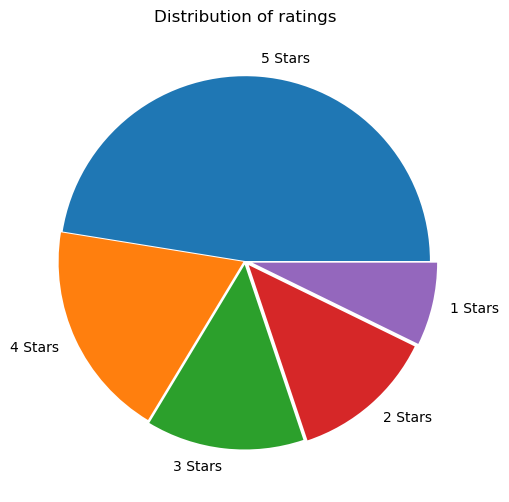

In [54]:
ratings = cleanedData['Rating'].value_counts()

plt.figure(figsize=(7, 6))

labels = ["5 Stars", "4 Stars", "3 Stars", "2 Stars", "1 Stars"]

myExplode = [0, 0.01, 0.02, 0.03, 0.04]

plt.pie(ratings, labels = labels, explode = myExplode)

plt.title("Distribution of ratings")
plt.show()

Based upon my findings on the ratings within the customer reviews, it appears that majority, over half of the pure gym community has had a positive experience within the gym. This may attribute to the facilities being in great condition.

#### Countplot based on the amount of times the company has responded

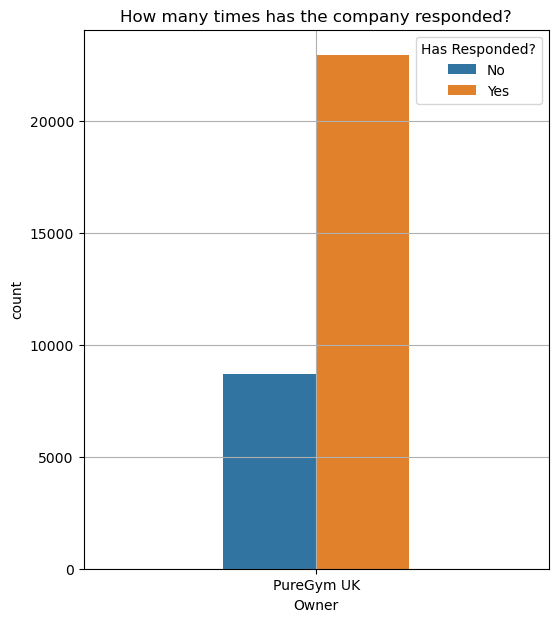

In [55]:
boolcol = cleanedData['Has Responded?']

plt.figure(figsize=(6, 7))

#create a sub bar plot
sbn.countplot(cleanedData, x = company, hue = boolcol, width = 0.4)

plt.title("How many times has the company responded?")
plt.grid()
plt.show()

Wihtin the reviews section of trustpilot, the owner has appeared to have responded to over half of the reviews received which must mean they are pretty active and content on meeting customer needs and ensuring that their next experience would be better

#### Histogram on Total Reviews

##### Zoomed out

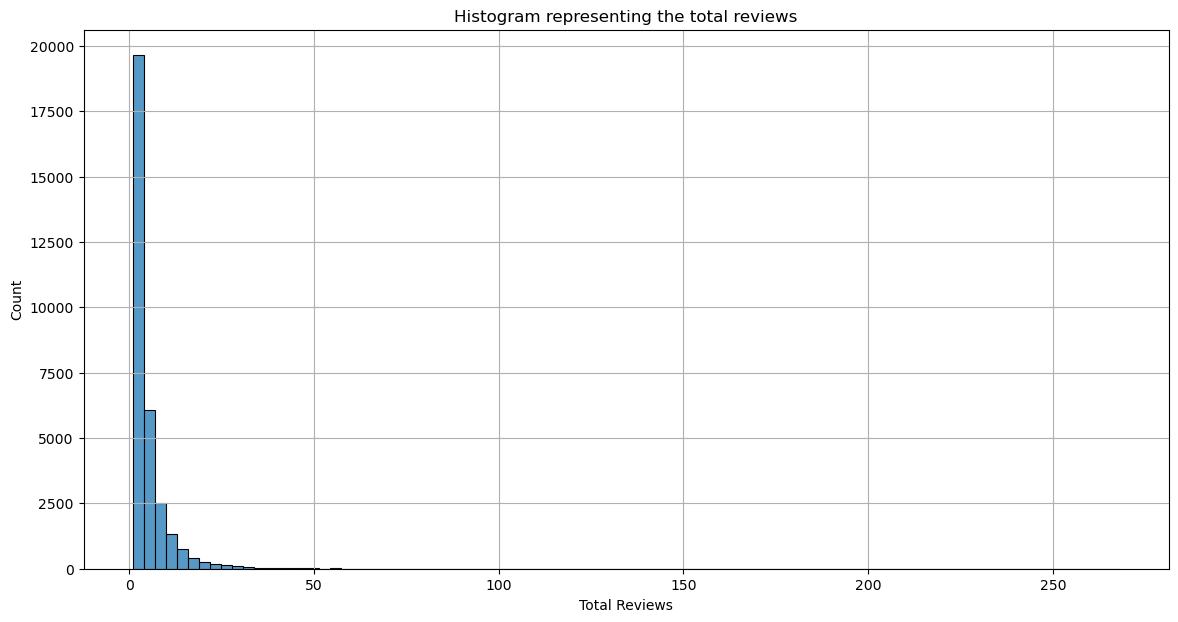

In [56]:
tReviews = cleanedData['Total Reviews']

plt.figure(figsize = (14, 7))

sbn.histplot(data = cleanedData, x = tReviews, bins = 90)

plt.title("Histogram representing the total reviews")
plt.grid()
plt.show()

##### Zoomed in

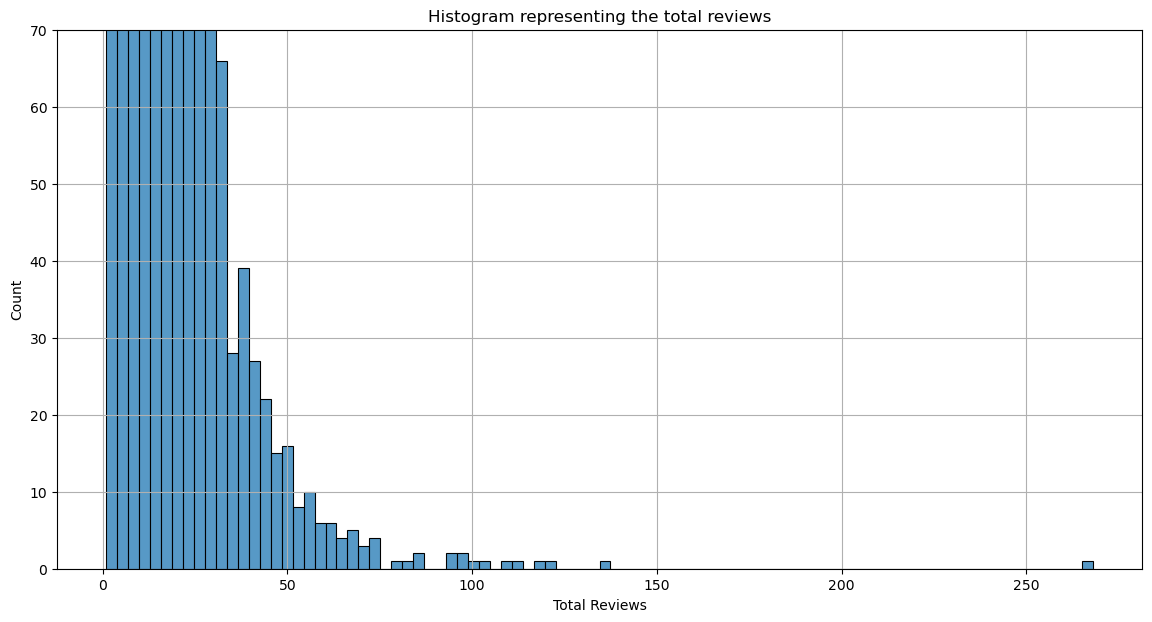

In [57]:
tReviews = cleanedData['Total Reviews']

plt.figure(figsize = (14, 7))

sbn.histplot(data = cleanedData, x = tReviews, bins = 90)

plt.title("Histogram representing the total reviews")
plt.ylim(0, 70)
plt.grid()
plt.show()

##### Analysis

Witnessing the distribution of the total number of reviews being made within the trust pilot website, It seems that users who make reviews on the gym itself seem to be new users

### Sentiment Analysis

As we shift our focus to the Sentiment Analysis section, I'll be using a pre-built model to assist us in identifying emotions within customer reviews. This tool promises to enhance the depth and accuracy of our analysis, acting as a valuable ally in deciphering the nuanced sentiments expressed in the textual content. Utilizing this advanced model aligns with our commitment to thorough and effective analytical methods.

#### 1) Create a Word Cloud about the reviews section

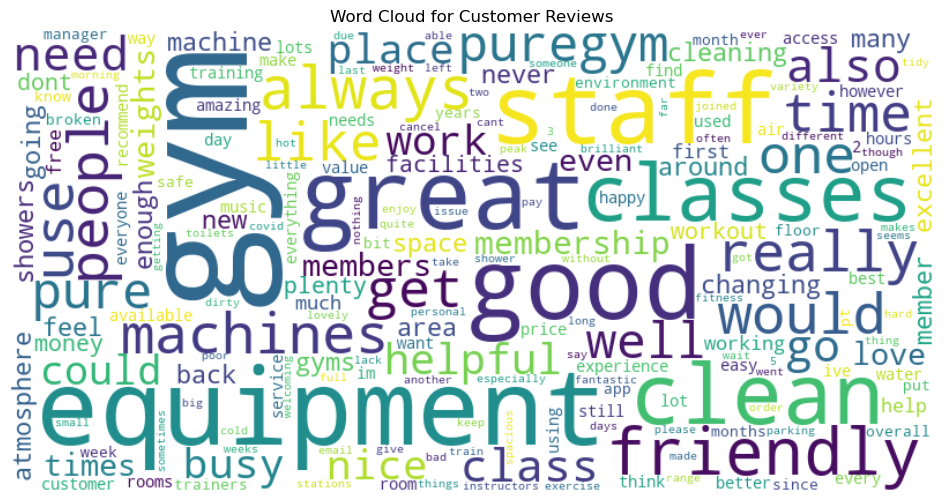

In [58]:
combineReviews = ' '.join(cleanedData['Review'].tolist())
                          
# Tokenize and filter stopwords
stop_words = set(stopwords.words('english'))
all_tokens = [word for word in word_tokenize(combineReviews.lower()) if word.isalnum() and word not in stop_words]

# Create a dictionary of word frequencies
word_freq = {word: count for word, count in Counter(all_tokens).items()}

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
                          
# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')
plt.show()

#### 2) what is the Word Frequency within customer reviews?

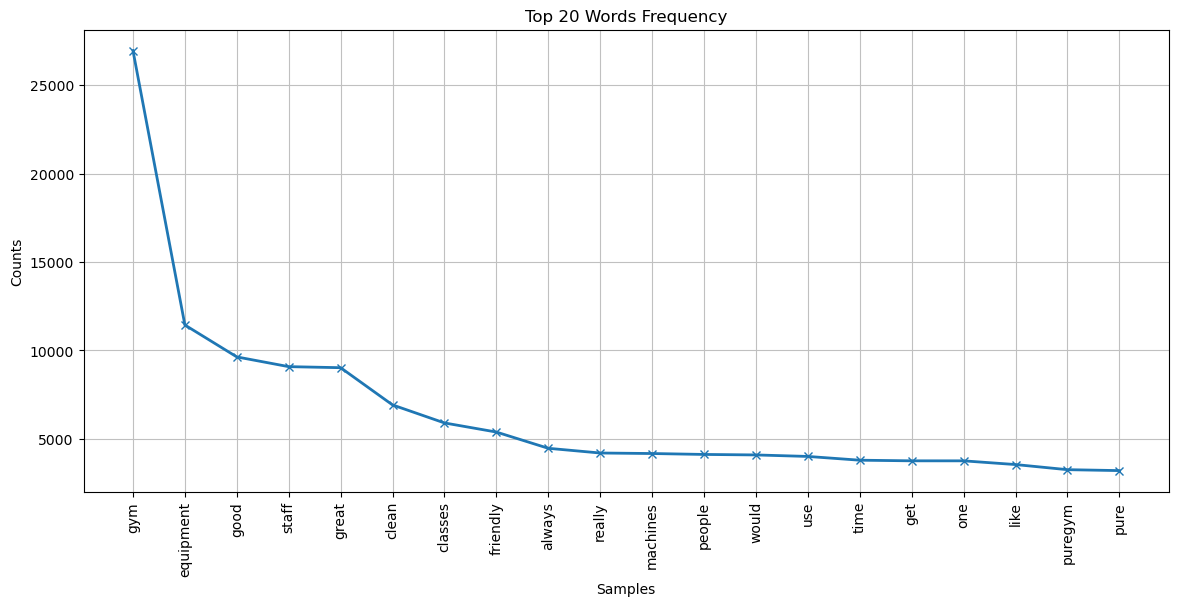

In [68]:
# Tokenize and clean the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return tokens

# Apply the preprocessing function to the 'Review' column
cleanedData['Tokens'] = cleanedData['Review'].apply(preprocess_text)

# Flatten the list of tokens
all_tokens = [token for sublist in cleanedData['Tokens'].tolist() for token in sublist]

# Calculate word frequencies
word_freq = FreqDist(all_tokens)

# Plot the top N words
top_n = 20
plt.figure(figsize=(14, 6))
word_freq.plot(top_n, title=f'Top {top_n} Words Frequency', marker = "x")
plt.show()

#### Models 

##### 2) Create a column for emotional sentiment and confidence

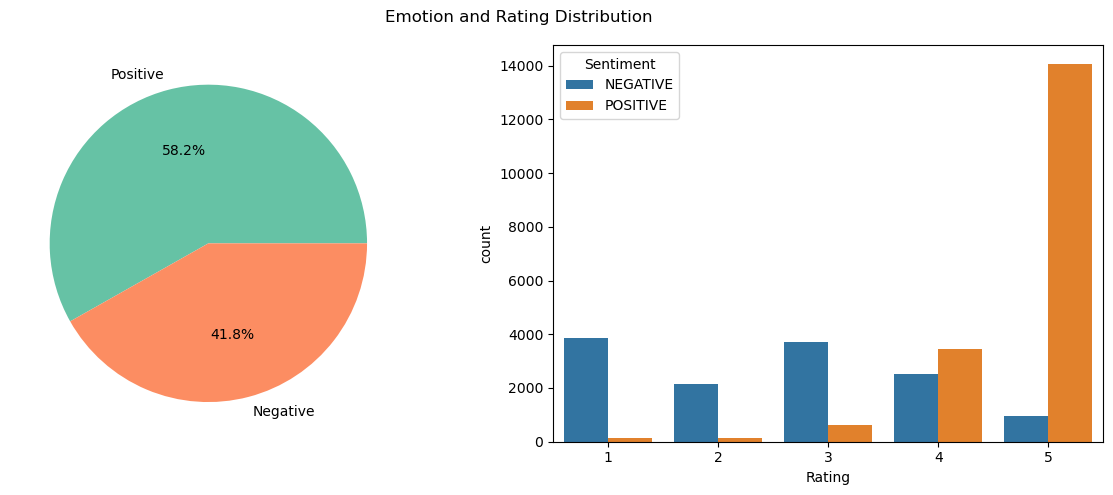

In [63]:
rating = cleanedData['Rating'].value_counts()
emotions = cleanedData['Sentiment'].value_counts()
labels = ["Positive", "Negative"]

# Set up the figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pie plot on the left subplot
axs[0].pie(emotions, 
           labels=labels, 
           colors=sbn.color_palette('Set2'),
           autopct="%1.1f%%")

# Count plot on the right subplot
sbn.countplot(data=cleanedData,
              x='Rating',
              hue='Sentiment',
              ax=axs[1])

# Set the overall title for the figure
plt.suptitle("Emotion and Rating Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

###### Popping and Pushing the Columns

In [59]:
# Load pre-trained sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

reviews = cleanedData['Review']

# Create empty lists to store results
sentiments = []
confidences = []

# Iterate through each review
for review in reviews:
    # Limit the length of the review to avoid size mismatch
    truncated_review = review[:512]  # You can adjust this limit based on your needs
    
    # Perform sentiment analysis
    result = sentiment_analysis(truncated_review)
    
    # Extract sentiment label and confidence score
    sentiment_label = result[0]['label']
    confidence = result[0]['score']
    
    # Map sentiment label to 'POSITIVE', 'NEGATIVE', or 'NEUTRAL'
    if sentiment_label == 'POSITIVE':
        sentiment = 'POSITIVE'
    elif sentiment_label == 'NEGATIVE':
        sentiment = 'NEGATIVE'
    else:
        sentiment = 'NEUTRAL'
    
    # Append results to lists
    sentiments.append(sentiment)
    confidences.append(confidence)

# Add sentiment and confidence columns to the DataFrame
cleanedData['Sentiment'] = sentiments
cleanedData['Confidence'] = confidences

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [60]:
pSentiment = cleanedData.pop('Sentiment')

cleanedData.insert(
    loc = 8,
    column = "Sentiment",
    value = pSentiment
)

In [61]:
pConfidence = cleanedData.pop('Confidence')

cleanedData.insert(
    loc = 9, 
    column = 'Confidence', 
    value = pConfidence
)

In [62]:
cleanedData

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Sentiment,Confidence,Owner,Owner Date Posted,Owners Response,Has Responded?
0,1,EC,Elena Curtis,GB,4,2023-12-17,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,NEGATIVE,0.999135,PureGym UK,No Date Provided,No Response Provided,No
1,4,Custom Image,Graham F,GB,4,2023-12-13,Overall a good experience,overall a good experience. its still too cramp...,NEGATIVE,0.972880,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...,Yes
2,8,IO,Ian Oldham,GB,5,2023-12-12,Excellent gym,"excellent gym, friendly environment, plenty of...",POSITIVE,0.999812,PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...,Yes
3,15,MB,Mick Bayley,GB,5,2023-11-12,I'm going to be so fit,havnt been a gym member for 20 years but this ...,POSITIVE,0.999735,PureGym UK,No Date Provided,No Response Provided,No
4,1,LU,Lucy,GB,5,2023-12-13,Chloe Lawrence PT at PureGym,i have been training with chloe lawrence at pu...,POSITIVE,0.999840,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35284,12,OL,Olga,GB,4,2015-10-23,Cheap and cheerful,if you are not very picky and dont expect saun...,POSITIVE,0.844899,PureGym UK,No Date Provided,No Response Provided,No
35285,12,Custom Image,Paul John Cox,GB,5,2015-02-18,NO excuses now!,i admit im not in the best shape and intend to...,POSITIVE,0.916473,PureGym UK,No Date Provided,No Response Provided,No
35286,22,Custom Image,Charlotte,DK,5,2015-02-07,Great classes,"the classes are great, i signed up due to the ...",POSITIVE,0.999671,PureGym UK,No Date Provided,No Response Provided,No
35287,15,RA,Ross Anderson,GB,4,2014-08-12,Decent gym,the pure gyms are well equipped and have every...,POSITIVE,0.995201,PureGym UK,No Date Provided,No Response Provided,No


##### 3) Create visualisations that represents the Distribution of Emotions

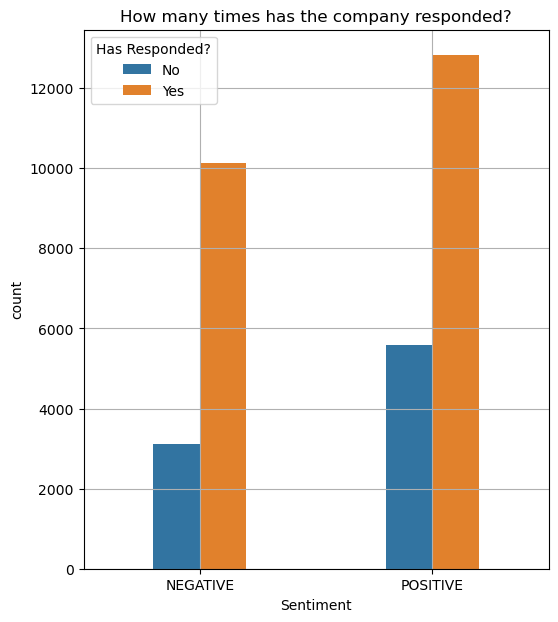

In [64]:
plt.figure(figsize=(6, 7))

#create a sub bar plot
sbn.countplot(cleanedData, x = 'Sentiment', hue = boolcol, width = 0.4)

plt.title("How many times has the company responded?")
plt.grid()
plt.show()

##### 4) Create a visualisation that details Emotional Trends Over Time

In [65]:
cleanedData['Date Experienced'] = pd.to_datetime(cleanedData['Date Experienced'])

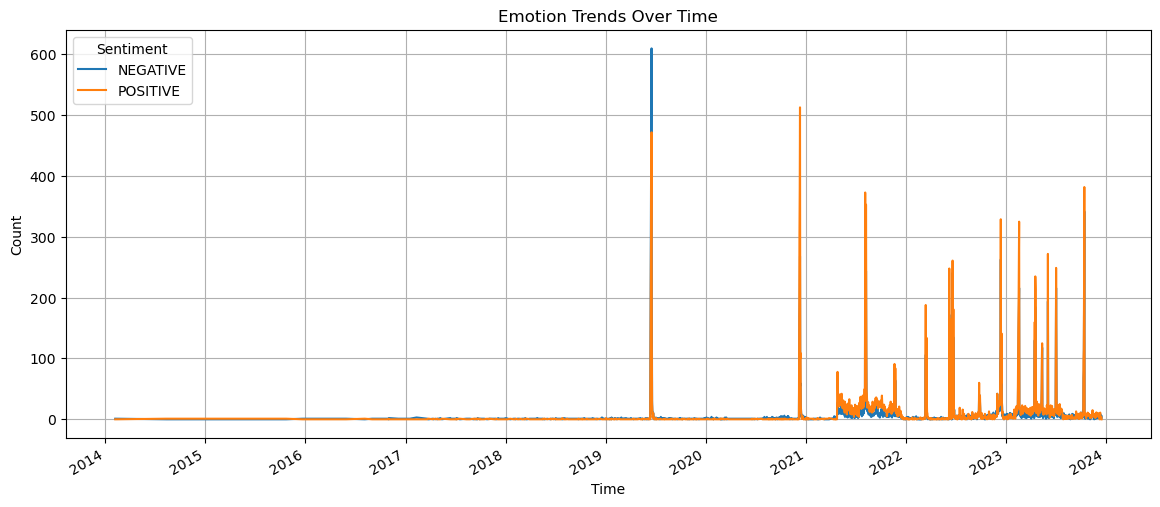

In [66]:
cleanedData['Date'] = cleanedData['Date Experienced']

# Group by Date and Emotional Sentiment and compute the count
emotion_over_time = cleanedData.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize = (14, 6))
emotion_over_time.plot(kind='line', ax=plt.gca())

plt.title('Emotion Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper left')
plt.grid()
plt.show()

## Exporting Dataset

In [49]:
cleanedData = cleaningData

In [50]:
cleanedData.to_csv("PureGym Customer Reviews.csv", index = False)